# ENGR 1330 – Computational Thinking and Data Science

**Names:** <br>
Aurora Raygoza - R11971489 <br>
Brian Jones - R11928990 <br>
Jagrati Kumari - R11963691


YouTube Link: https://youtu.be/bH-Bne1lEZk

## Power consumption Final Project

Power consumption in different zones in a city area can be affected by weather parameters, the landscape and the type of occupancy (residential/industrial etc). In this project, we will analyze the data of power consumtion for year 2017 in 3 different zones in a city named Tetuan in Morocco. We will find three best fitted data models to predict the power consumptions in the three different zones.


## Objective(s):
- Literature scan on power consumption in city areas and how the atmospheric and landscape conditions affect total power consumption
- Analyze an existing measurement dataset and build data models to predict power consumption in 3 different zones in a city.

The measurements database is comprised of 7 columns:
1. DateTime
2. Temperature
3. Humidity
4. Wind speed
5. Zone 1 power consumption
6. Zone 2 power consumption
7. Zone 3 power consumption

Temperature, humidity and Windspeed being the factors/inputs affecting the consumed powers (outputs) in the 3 different zones.  


- Implement a function to allow users to enter input parameters and return an estimated power consumption. (by defining a function that takes input parameters and plugs them into the model that you have found and returns the output)

## Tasks:

**Literature Research:**

1. https://medium.com/mlearning-ai/predicting-electricity-consumption-using-weather-data-29d2a35e6ac9

2. Hernández L, Baladrón C, Aguiar JM, Calavia L, Carro B, Sánchez-Esguevillas A, Cook DJ, Chinarro D, Gómez J. A Study of the Relationship between Weather Variables and Electric Power Demand inside a Smart Grid/Smart World Framework. Sensors (Basel). 2012 Aug 27;12(9):11571–91. doi: 10.3390/s120911571. PMCID: PMC3478798.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3478798/

3. https://www.nrel.gov/docs/fy15osti/64297.pdf

**Exploratory Data Analysis**
- Describe the database. Include visualization of the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.
- Create pairplots for all the columns except DateTime, make comments on your observation

**Model Building**
- Build 3 different data models to fit the power consumption for the 3 zones. For each zone:
     - you should  determine which inputs strongly affect the power.
     - Build 3 models using all input factors for 3 zones
     - Assess data model quality (decide which model is best) including visualization tools
- Build the input data interface for using the model (by defining and function that takes input parameters and plugs them in into the model that you have found and returns the output)
- Using the model for each zone, determine projected power consumptions and an assessment of uncertainty for 3 weather conditions listed below:

|Temperature|Humidity|Windspeed|
|:---|:---|:---|
|12.5|71.0|0.073|
|21.8|85.2|0.068|
|17.9|54.0|0.083|
               
       
**Documentation**
- Training and Project management video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf, Word template is in BlackBoard.
- Final ipynb file (see deliverables below)

## Deliverables:

#### Part 1 Interim Report (due Dec 2):
A report that briefly describes the project. Use the Interim Report Template in BlackBoard.   
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart) or list of meeting times.
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)  

#### Part 2 Final Report (due Dec 9):
- A well-documented JupyterLab (using a python kernel), using markdown cells and commenting for explanations and text. In your jupyterlab, you need to include: <br>
    - the model (have both from scratch implementation of the model and building the model using ml library, just like we have in lecture notes. If you have more than one model, then it is enough to implement only one of them from scratch and use the libraries for the rest.) <br>
    - assessment of the model <br>
    - function to make predictions using the model <br>

- A how-to video demonstrating the performance and description of your model. Go over the ipynb file and explain the problem you are solving. Run the code and explain the code and the output. Include problems that you were not able to solve and also talk about project management, such as who did what.
- A final peer evaluation report, where each group member should rate the participation and contribution of the other members. You can include this as an additional PDF document stating if everyone fulfilled their roles in the group.

Keep the total video length to less than 10 minutes; submit as an *unlisted* YouTube video, and supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind that a 10-minute video can approach 100MB file size before compression, so it won't be uploaded to Blackboard and cannot be emailed.

**DATA** **COLLECTION**

In [4]:
# import necessary libraries for mathematical and visual functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
# load and read the CSV file into a DataFrame

power_data= pd.read_csv('Tetuan City power consumption.csv')
power_data.head()

,DateTime,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


In [6]:
# display dataset information and statistical summary

power_data.info() #provides data types and non-null counts
power_data.describe() #gives a statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   Zone 1 Power Consumption  52416 non-null  float64
 5   Zone 2 Power Consumption  52416 non-null  float64
 6   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360


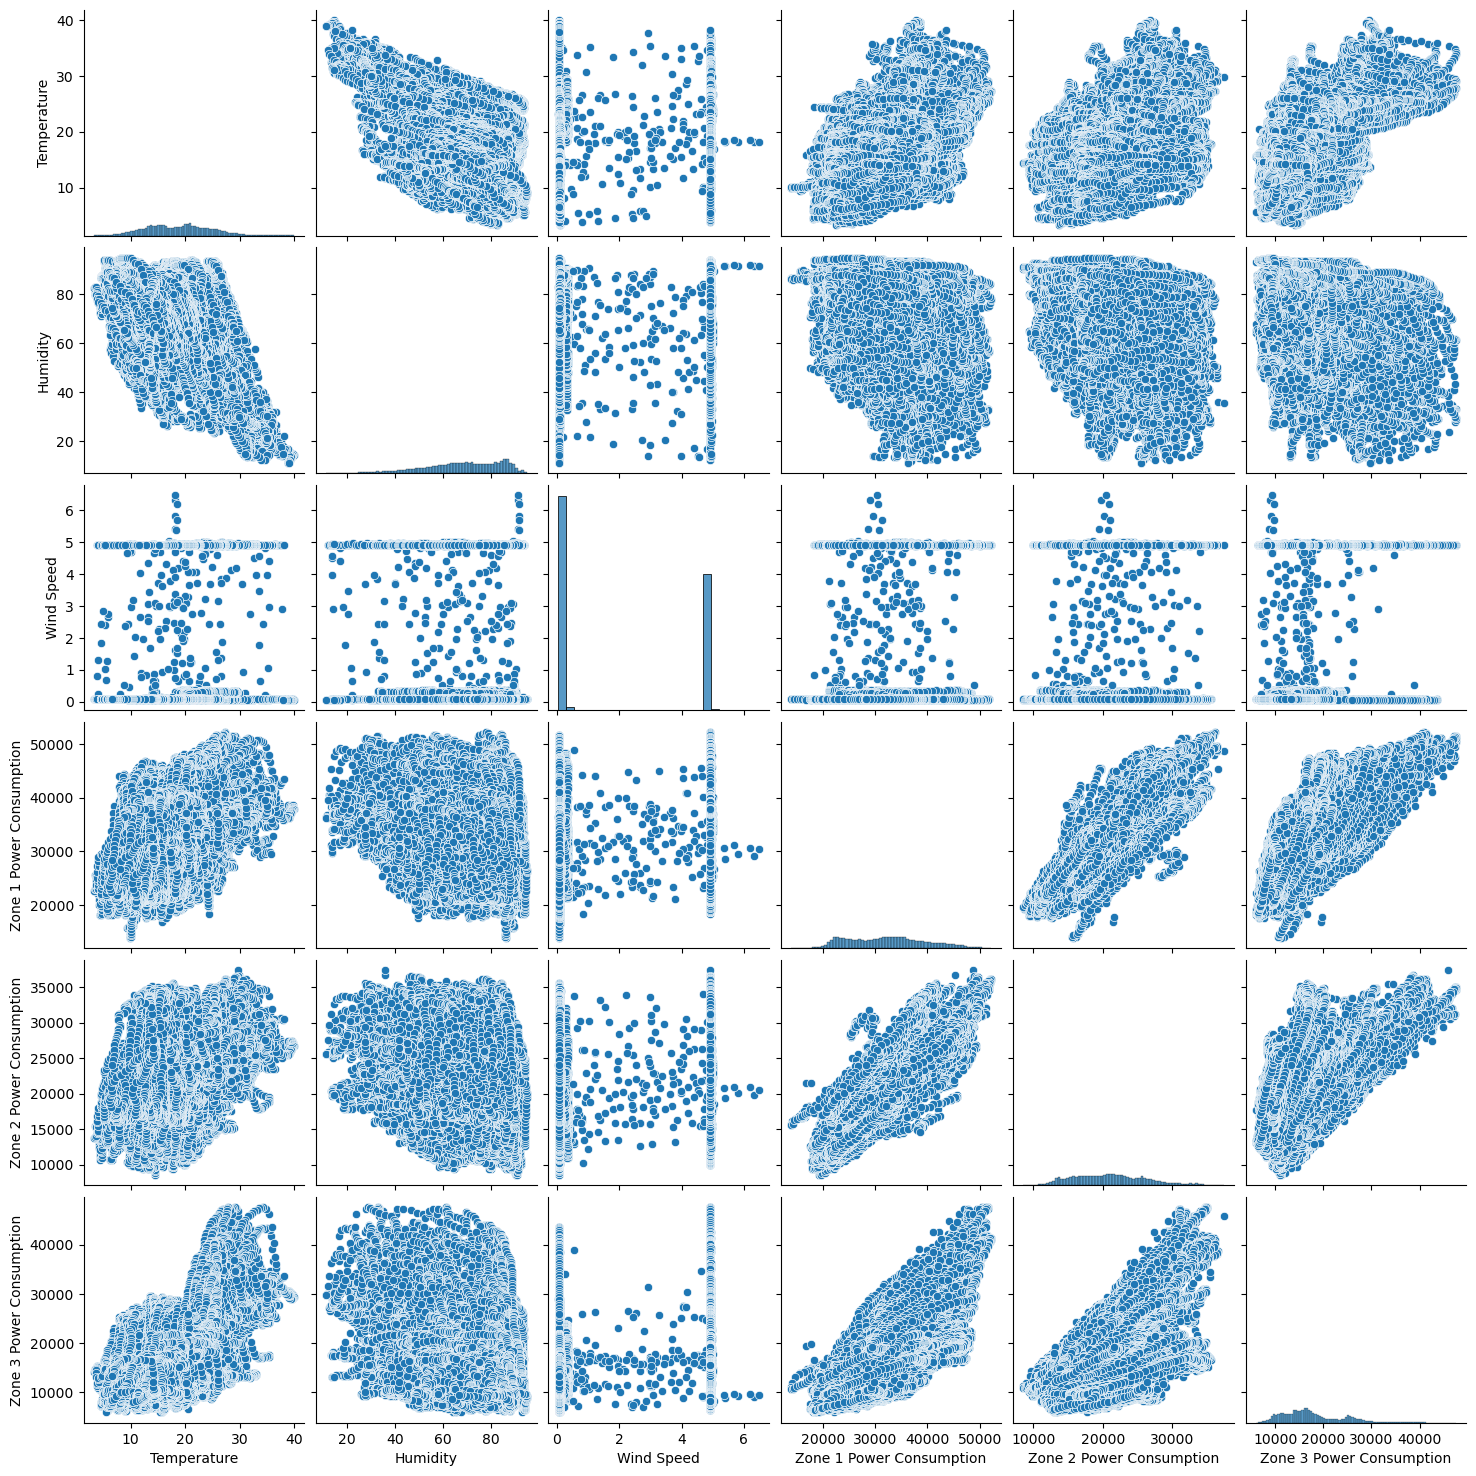

In [7]:
# Using seaborn library to create scatter plot between all columns
# visualizing correlations

sns.pairplot(power_data)

**OBSERVATIONS of Scatterplots:**

1. Temperature vs. Power Consumption
- positive trends indicate that as temperature increases, power consumption in all zones also increases.

2. Humidity vs. Power Consumption
- weak negative trend suggests that higher humidity slightly decreases power consumption.

3. Zone Relationships
- Zones 1 and 2 exhibit strong linear patterns, indicating similar behvaior or shared dependencies.

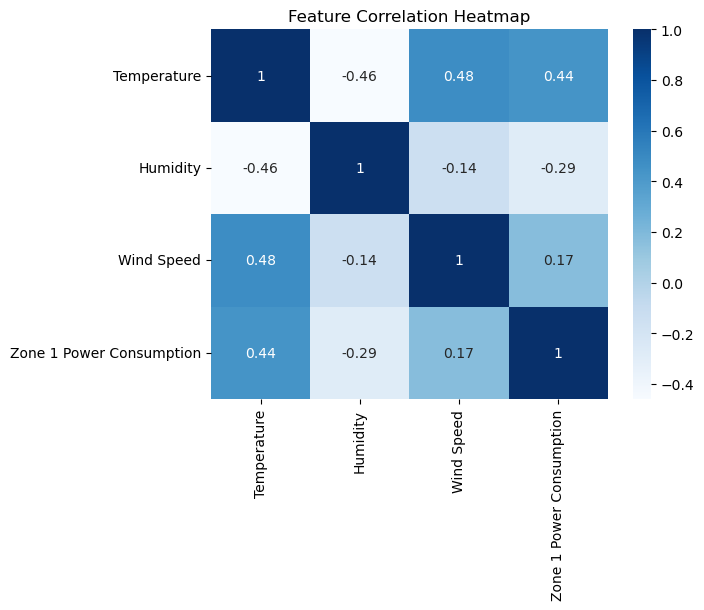

In [8]:
# Computing the correlation matrix and displaying it as a heatmap(Zone 1)

corr = power_data[['Temperature','Humidity','Wind Speed','Zone 1 Power Consumption']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

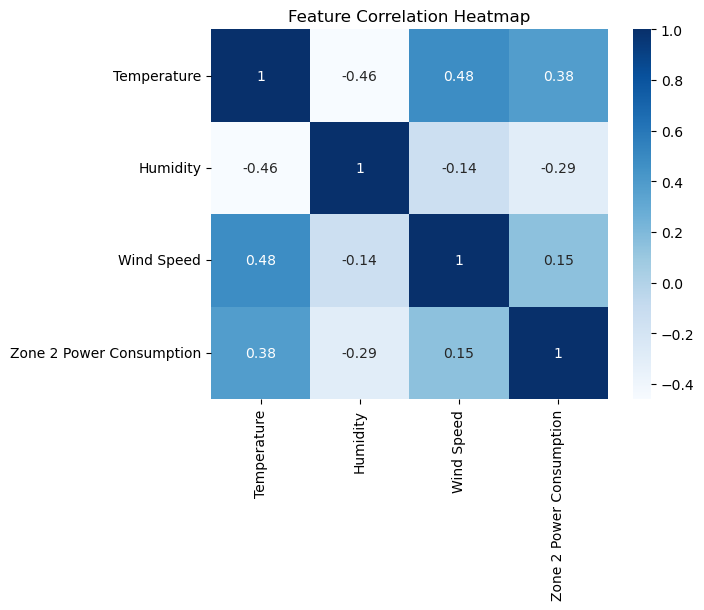

In [9]:
# Computing the correlation matrix and displaying it as a heatmap(Zone 2)

corr = power_data[['Temperature','Humidity','Wind Speed','Zone 2 Power Consumption']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

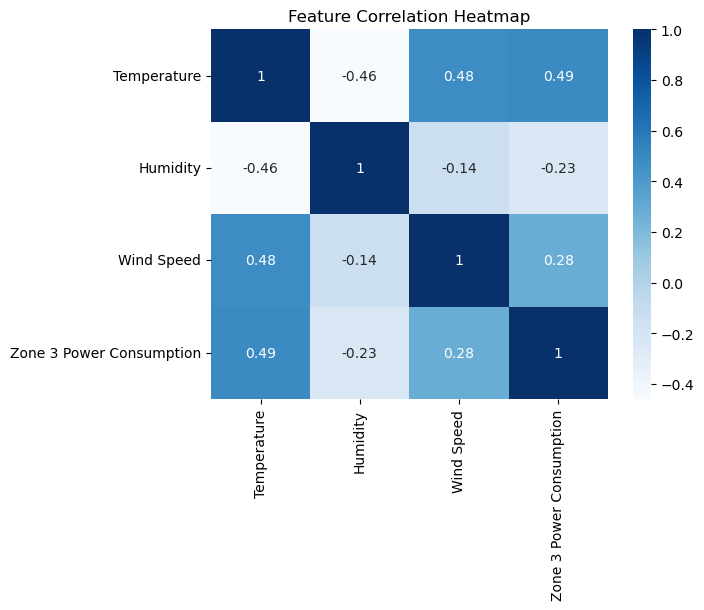

In [10]:
# Computing the correlation matrix and displaying it as a heatmap(Zone 3)

corr = power_data[['Temperature','Humidity','Wind Speed','Zone 3 Power Consumption']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

**OBSERVATIONS for heatmaps:**

1. Temperature
- positively correlated with all zones of power consumption (strongest correlation with Zone 3 Power Consumption).
- Moderately correlated with Zone 1 and Zone 2.

2. Humidity
- negatively correlated with power consumption in all zones.
- the weakest correlation is with Zone 3 power compustion.

3. Wind Speed
- weak positive correlation with all zones of power consumption.
- the strongest correlation is with Zone 3 power consumption.

4. Power Consumption Zones:
- Zone 1 and Zone 2 show the highest positive correlation, indicating a strong linear relationship between their power consumption.
- Zone 3 power consumption also correlates strongly with both Zone 1 and Zone 2.

In [11]:
# Power consumption unit standardization
power_data['Zone 1 Power Consumption (standard units)'] = (power_data['Zone 1 Power Consumption'] - np.mean(power_data['Zone 1 Power Consumption']))/(np.std(power_data['Zone 1 Power Consumption']))
power_data['Zone 2 Power Consumption (standard units)'] = (power_data['Zone 2 Power Consumption'] - np.mean(power_data['Zone 2 Power Consumption']))/(np.std(power_data['Zone 2 Power Consumption']))
power_data['Zone 3 Power Consumption (standard units)'] = (power_data['Zone 3 Power Consumption'] - np.mean(power_data['Zone 3 Power Consumption']))/(np.std(power_data['Zone 3 Power Consumption']))

# Temp, humidity, and wind standardization
power_data['Temperature (standard units)'] = (power_data['Temperature'] - np.mean(power_data['Temperature']))/(np.std(power_data['Temperature']))
power_data['Humidity (standard units)'] = (power_data['Humidity'] - np.mean(power_data['Humidity']))/(np.std(power_data['Humidity']))
power_data['Wind Speed (standard units)'] = (power_data['Wind Speed'] - np.mean(power_data['Wind Speed']))/(np.std(power_data['Wind Speed']))

power_data.head()

,DateTime,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Zone 1 Power Consumption (standard units),Zone 2 Power Consumption (standard units),Zone 3 Power Consumption (standard units),Temperature (standard units),Humidity (standard units),Wind Speed (standard units)
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386,0.239917,-0.944672,0.363262,-2.106645,0.356277,-0.798900
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434,-0.354854,-0.320573,0.346669,-2.131578,0.401291,-0.798900
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373,-0.451143,-0.391398,0.276804,-2.148946,0.401291,-0.800178
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711,-0.577254,-0.515516,0.160655,-2.181962,0.433443,-0.798900
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964,-0.702514,-0.609482,0.091663,-2.216353,0.478456,-0.799752


In [12]:
# dividing the data input into training and testing sets

random = power_data.sample(52416, replace = False)
training_set = random.iloc[0:34944, :]
test_set = random.iloc[34944:, :]

print(len(training_set))
print(len(test_set))
print(training_set.shape)
print(training_set.columns)
print(training_set.iloc[:, 10:13].shape)

34944
17472
(34944, 13)
Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'Zone 1 Power Consumption', 'Zone 2 Power Consumption',
       'Zone 3 Power Consumption', 'Zone 1 Power Consumption (standard units)',
       'Zone 2 Power Consumption (standard units)',
       'Zone 3 Power Consumption (standard units)',
       'Temperature (standard units)', 'Humidity (standard units)',
       'Wind Speed (standard units)'],
      dtype='object')
(34944, 3)


In [13]:
# separating features (X) and target varible (Y) for training and testing sets

# training and testing data for zone 1
x_train_z1 = training_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_train_z1 = training_set.iloc[:, 4].values
y_train_z1 = np.reshape(y_train_z1, (len(y_train_z1), 1))

print("x_train_Shape_z1:", np.shape(x_train_z1))
print("y_train_Shape_z1:", np.shape(y_train_z1))

x_test_z1 = test_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_test_z1 = test_set.iloc[:, 4].values
y_test_z1 = np.reshape(y_test_z1, (len(y_test_z1), 1))

print("x_test_Shape_z1:", np.shape(x_test_z1))
print("y_test_Shape_z1:", np.shape(y_test_z1))

# training and testing data for zone 2
x_train_z2 = training_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_train_z2 = training_set.iloc[:, 5].values
y_train_z2 = np.reshape(y_train_z2, (len(y_train_z2), 1))

print("x_train_Shape_z2:", np.shape(x_train_z2))
print("y_train_Shape_z2:", np.shape(y_train_z2))

x_test_z2 = test_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_test_z2 = test_set.iloc[:, 4].values
y_test_z2 = np.reshape(y_test_z2, (len(y_test_z2), 1))

print("x_test_Shape_z2:", np.shape(x_test_z2))
print("y_test_Shape_z2:", np.shape(y_test_z2))

# training and testing data for zone 3
x_train_z3 = training_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_train_z3 = training_set.iloc[:, 6].values
y_train_z3 = np.reshape(y_train_z3, (len(y_train_z3), 1))

print("x_train_Shape_z3:", np.shape(x_train_z3))
print("y_train_Shape_z3:", np.shape(y_train_z3))

x_test_z3 = test_set[['Temperature (standard units)', 'Humidity (standard units)', 'Wind Speed (standard units)']].values
y_test_z3 = test_set.iloc[:, 4].values
y_test_z3 = np.reshape(y_test_z3, (len(y_test_z3), 1))

print("x_test_Shape_z3:", np.shape(x_test_z3))
print("y_test_Shape_z3:", np.shape(y_test_z3))


x_train_Shape_z1: (34944, 3)
y_train_Shape_z1: (34944, 1)
x_test_Shape_z1: (17472, 3)
y_test_Shape_z1: (17472, 1)
x_train_Shape_z2: (34944, 3)
y_train_Shape_z2: (34944, 1)
x_test_Shape_z2: (17472, 3)
y_test_Shape_z2: (17472, 1)
x_train_Shape_z3: (34944, 3)
y_train_Shape_z3: (34944, 1)
x_test_Shape_z3: (17472, 3)
y_test_Shape_z3: (17472, 1)


In [14]:
# transposing and stacking a row of ones vertically to the 'x_train"
# and the 'x_test' for the purpose of vectorization for each zone

# Zone 1
x_train_trans1 = np.transpose(x_train_z1)
x_train1 = np.vstack((np.ones((1,len(x_train_z1))),x_train_trans1))
print("x_train1:", np.shape(x_train1))

x_test_trans1 = np.transpose(x_test_z1)
x_test1 = np.vstack((np.ones((1,len(x_test_z1))),x_test_trans1))
print("x_test1:", np.shape(x_test1))

# Zone 2
x_train_trans2 = np.transpose(x_train_z2)
x_train2 = np.vstack((np.ones((1,len(x_train_z2))),x_train_trans2))
print("x_train2:", np.shape(x_train2))

x_test_trans2 = np.transpose(x_test_z2)
x_test2 = np.vstack((np.ones((1,len(x_test_z2))),x_test_trans2))
print("x_test2:", np.shape(x_test2))

# Zone 3
x_train_trans3 = np.transpose(x_train_z3)
x_train3 = np.vstack((np.ones((1,len(x_train_z3))),x_train_trans3))
print("x_train3:", np.shape(x_train3))

x_test_trans3 = np.transpose(x_test_z3)
x_test3 = np.vstack((np.ones((1,len(x_test_z3))),x_test_trans3))
print("x_test3:", np.shape(x_test3))



x_train1: (4, 34944)
x_test1: (4, 17472)
x_train2: (4, 34944)
x_test2: (4, 17472)
x_train3: (4, 34944)
x_test3: (4, 17472)


In [15]:
# the 4 should be changed to the same length as the above code once its finished
theta = np.zeros((4,1))
theta_z1 = theta
theta_z2 = theta
theta_z3 = theta
print("theta:", np.shape(theta))

theta: (4, 1)


In [16]:
#Implementing the gradient descent algorithm

# Zone 1
no_of_iter = np.arange(1, 10000)
alpha = 0.003

m_train_z1 = len(x_train_z1)
m_test_z1 = len(x_test_z1)

costfunc_z1 = []

#Iteration loop
for i in no_of_iter:
    z1 = np.transpose(theta_z1)@x_train1 #Hypothesis function
    cf = (1/(2*m_train_z1))*(np.sum((np.transpose(z1)-y_train_z1)**2)) #Cost function
    costfunc_z1.append(cf) #Appending cost function
    delthetaj = (1/m_train_z1)*((x_train1)@(np.transpose(z1)-y_train_z1)) #Derivative of cost function
    theta_z1 = theta_z1 - (alpha*delthetaj) #Updating theta values

print(len(costfunc_z1))
print(theta_z1)

# Zone 2
m_train_z2 = len(x_train_z2)
m_test_z2 = len(x_test_z2)

costfunc_z2 = []

#Iteration loop
for i in no_of_iter:
    z2 = np.transpose(theta_z2)@x_train2 #Hypothesis function
    cf = (1/(2*m_train_z2))*(np.sum((np.transpose(z2)-y_train_z2)**2)) #Cost function
    costfunc_z2.append(cf) #Appending cost function
    delthetaj = (1/m_train_z2)*((x_train2)@(np.transpose(z2)-y_train_z2)) #Derivative of cost function
    theta_z2 = theta_z2 - (alpha*delthetaj) #Updating theta values

print(len(costfunc_z2))
print(theta_z2)

# Zone 3
m_train_z3 = len(x_train_z3)
m_test_z3 = len(x_test_z3)

costfunc_z3 = []

#Iteration loop
for i in no_of_iter:
    z3 = np.transpose(theta_z3)@x_train3 #Hypothesis function
    cf = (1/(2*m_train_z3))*(np.sum((np.transpose(z3)-y_train_z3)**2)) #Cost function
    costfunc_z3.append(cf) #Appending cost function
    delthetaj = (1/m_train_z3)*((x_train3)@(np.transpose(z3)-y_train_z3)) #Derivative of cost function
    theta_z3 = theta_z3 - (alpha*delthetaj) #Updating theta values

print(len(costfunc_z3))
print(theta_z3)

9999
[[32354.60317722]
 [ 2981.13596284]
 [ -723.90639987]
 [ -341.24538448]]
9999
[[21058.96297445]
 [ 1726.76310605]
 [ -773.36265332]
 [ -187.39645773]]
9999
[[17829.66771583]
 [ 3023.6342314 ]
 [ -110.67955428]
 [  369.34670602]]


Text(0.5, 1.0, 'Predictions vs. actual values in the training set (Zone 3)')

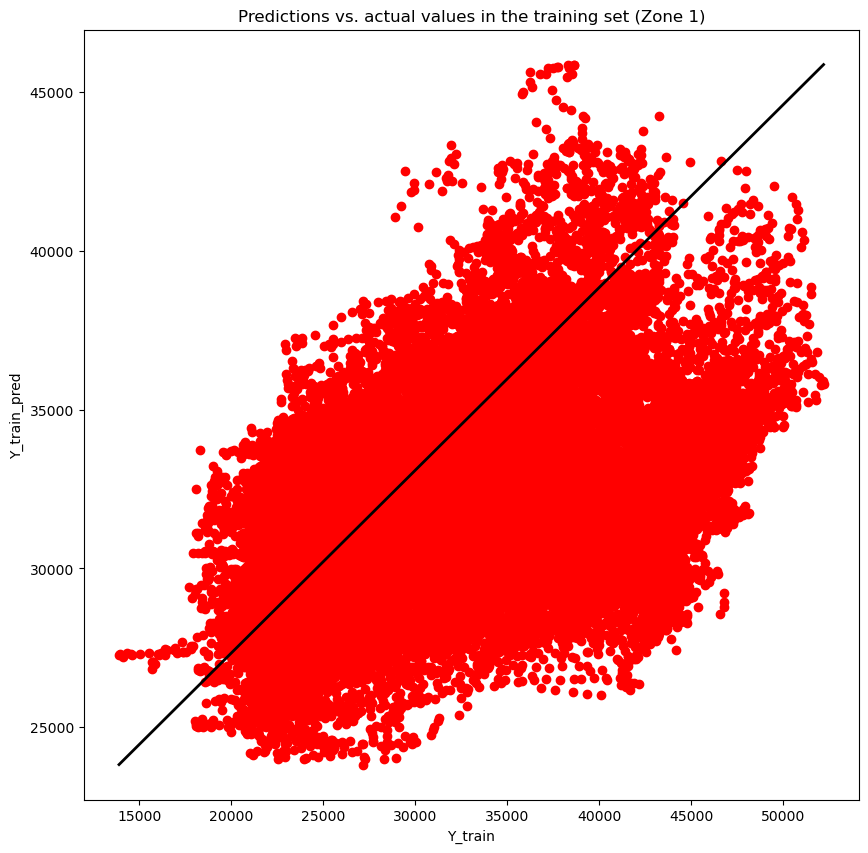

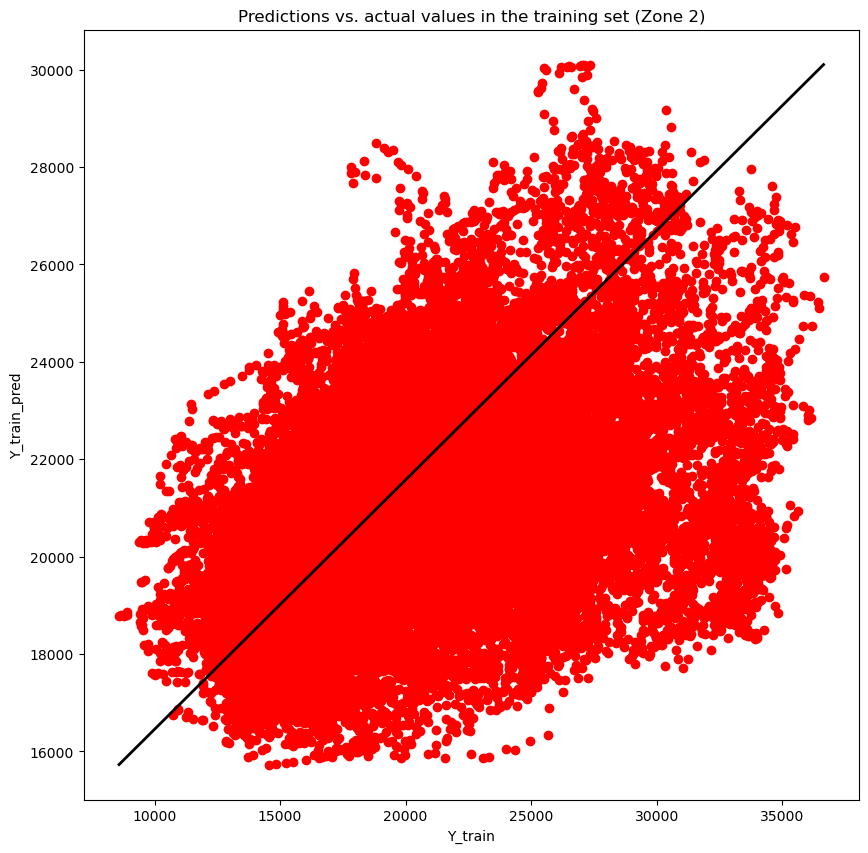

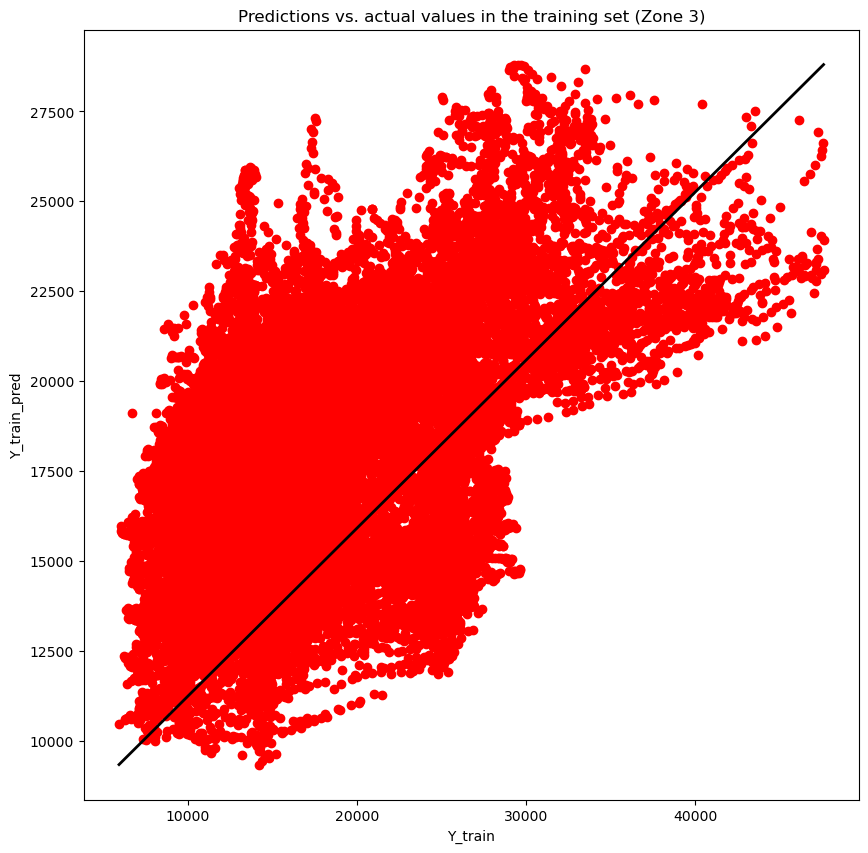

In [17]:
# Testing the model on the training set for the different zones


# Zone 1
h_theta1 = np.transpose(theta_z1)@x_train1
y_train_pred1 = np.transpose(h_theta1)

plt.figure(figsize = (10,10))
plt.scatter(y_train_z1, y_train_pred1, color='r')
plt.plot([y_train_z1.min(), y_train_z1.max()], [y_train_pred1.min(), y_train_pred1.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set (Zone 1)")

# Zone 2
h_theta2 = np.transpose(theta_z2)@x_train2
y_train_pred2 = np.transpose(h_theta2)

plt.figure(figsize = (10,10))
plt.scatter(y_train_z2, y_train_pred2, color='r')
plt.plot([y_train_z2.min(), y_train_z2.max()], [y_train_pred2.min(), y_train_pred2.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set (Zone 2)")

# Zone 3
h_theta3 = np.transpose(theta_z3)@x_train3
y_train_pred3 = np.transpose(h_theta3)

plt.figure(figsize = (10,10))
plt.scatter(y_train_z3, y_train_pred3, color='r')
plt.plot([y_train_z3.min(), y_train_z3.max()], [y_train_pred3.min(), y_train_pred3.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set (Zone 3)")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set (Zone 3)')

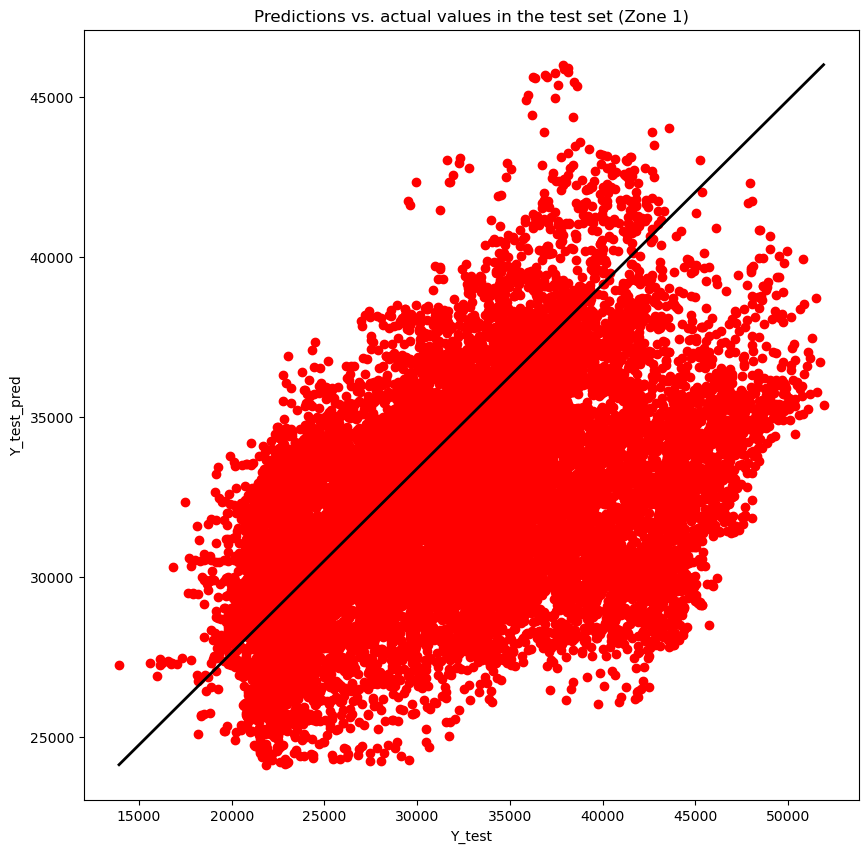

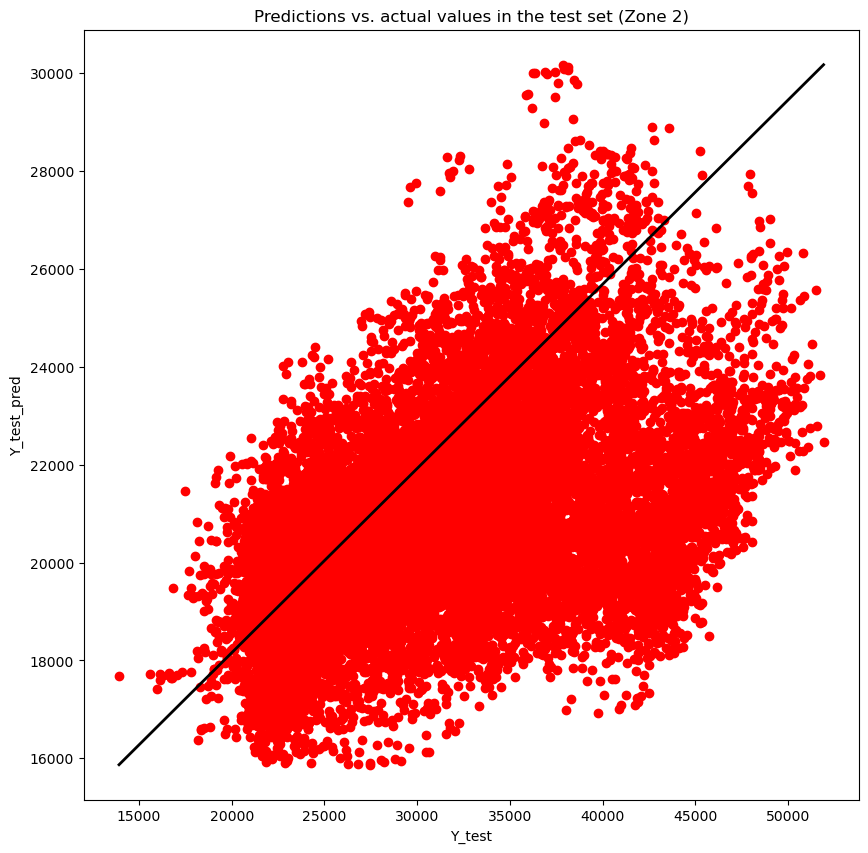

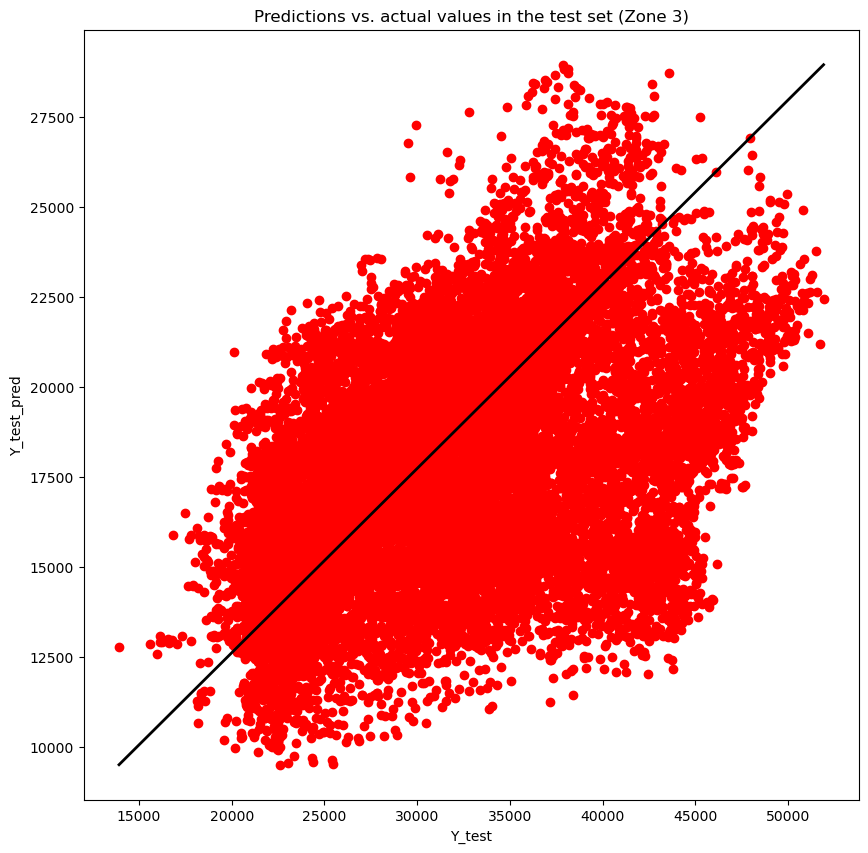

In [18]:
# Testing the model on the test set for the different zones

# Zone 1
h_theta_test1 = np.transpose(theta_z1)@x_test1
y_test_pred1 = np.transpose(h_theta_test1)

plt.figure(figsize = (10,10))
plt.scatter(y_test_z1, y_test_pred1, color='r')
plt.plot([y_test_z1.min(), y_test_z1.max()], [y_test_pred1.min(), y_test_pred1.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set (Zone 1)")

# Zone 2
h_theta_test2 = np.transpose(theta_z2)@x_test2
y_test_pred2 = np.transpose(h_theta_test2)

plt.figure(figsize = (10,10))
plt.scatter(y_test_z2, y_test_pred2, color='r')
plt.plot([y_test_z2.min(), y_test_z2.max()], [y_test_pred2.min(), y_test_pred2.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set (Zone 2)")

# Zone 3
h_theta_test3 = np.transpose(theta_z3)@x_test3
y_test_pred3 = np.transpose(h_theta_test3)

plt.figure(figsize = (10,10))
plt.scatter(y_test_z3, y_test_pred3, color='r')
plt.plot([y_test_z3.min(), y_test_z3.max()], [y_test_pred3.min(), y_test_pred3.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set (Zone 3)")

Text(0.5, 1.0, 'Zone 1 power consumption vs. number of iterations')

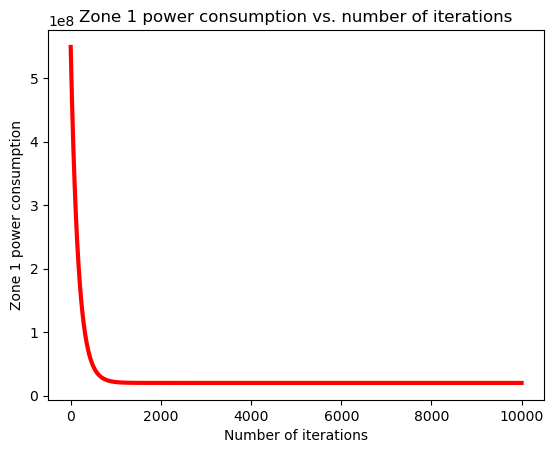

In [19]:
#Plotting cost function vs. number of iterations

plt.plot(no_of_iter[:9999],costfunc_z1[:9999],color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Zone 1 power consumption")
plt.title("Zone 1 power consumption vs. number of iterations")

Text(0.5, 1.0, 'Zone 2 power consumption vs. number of iterations')

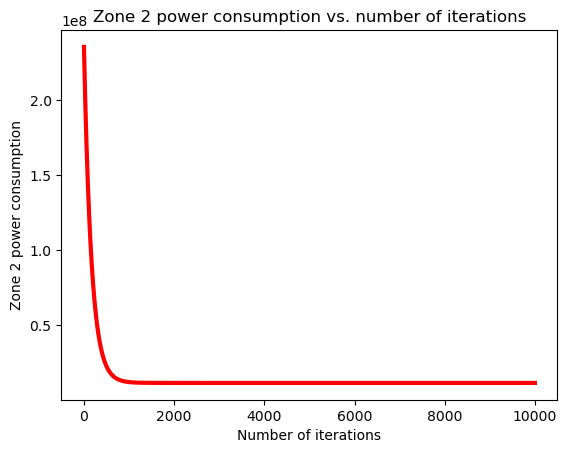

In [20]:
plt.plot(no_of_iter[:9999],costfunc_z2[:9999],color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Zone 2 power consumption")
plt.title("Zone 2 power consumption vs. number of iterations")


Text(0.5, 1.0, 'Zone 3 power consumption vs. number of iterations')

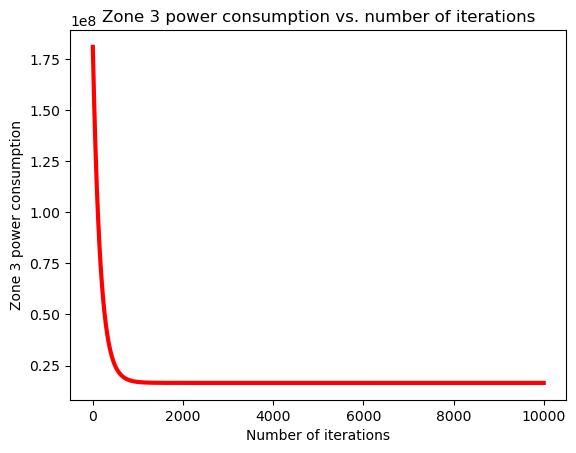

In [21]:
plt.plot(no_of_iter[:9999],costfunc_z3[:9999],color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Zone 3 power consumption")
plt.title("Zone 3 power consumption vs. number of iterations")

In [22]:
#Computing the MSE and the RMSE values for the predictions made on the training set
#quantify the error

#Zone 1
MSE_train_z1 = (1/m_train_z1)*(np.sum((y_train_z1-y_train_pred1)**2))
RMSE_train_z1 = np.sqrt(MSE_train_z1)

print('Zone 1 training MSE:',round(MSE_train_z1,4))
print('Zone 1 training RMSE:',round(RMSE_train_z1,4))

#Zone 2
MSE_train_z2 = (1/m_train_z2)*(np.sum((y_train_z2-y_train_pred2)**2))
RMSE_train_z2 = np.sqrt(MSE_train_z2)

print('Zone 2 training MSE:',round(MSE_train_z2,4))
print('Zone 2 training RMSE:',round(RMSE_train_z2,4))

#Zone 3
MSE_train_z3 = (1/m_train_z3)*(np.sum((y_train_z3-y_train_pred3)**2))
RMSE_train_z3 = np.sqrt(MSE_train_z3)

print('Zone 3 training MSE:',round(MSE_train_z3,4))
print('Zone 3 training RMSE:',round(RMSE_train_z3,4))

Zone 1 training MSE: 40424370.1024
Zone 1 training RMSE: 6358.0162
Zone 2 training MSE: 22782056.5855
Zone 2 training RMSE: 4773.0553
Zone 3 training MSE: 32992791.6707
Zone 3 training RMSE: 5743.9352


In [23]:
#Computing the MSE and the RMSE values for the predictions made on the test set

# Zone 1
MSE_test_z1 = (1/m_test_z1)*(np.sum((y_test_z1-y_test_pred1)**2))
RMSE_test_z1 = np.sqrt(MSE_test_z1)

print('Zone 1 testing MSE:',round(MSE_test_z1,4))
print('Zone 1 testing RMSE:',round(RMSE_test_z1,4))

# Zone 2
MSE_test_z2 = (1/m_test_z2)*(np.sum((y_test_z2-y_test_pred2)**2))
RMSE_test_z2 = np.sqrt(MSE_test_z2)

print('Zone 2 testing MSE:',round(MSE_test_z2,4))
print('Zone 2 testing RMSE:',round(RMSE_test_z2,4))

# Zone 3
MSE_test_z3 = (1/m_test_z3)*(np.sum((y_test_z3-y_test_pred3)**2))
RMSE_test_z3 = np.sqrt(MSE_test_z3)

print('Zone 3 testing MSE:',round(MSE_test_z3,4))
print('Zone 3 testing RMSE:',round(RMSE_test_z3,4))

Zone 1 testing MSE: 40508609.9325
Zone 1 testing RMSE: 6364.6375
Zone 2 testing MSE: 168623395.7145
Zone 2 testing RMSE: 12985.5071
Zone 3 testing MSE: 251406045.4521
Zone 3 testing RMSE: 15855.789


**Implementing linear algorithm using Scikit-Learn library**

In [24]:
# displaying the first 5 rows of the data

power_data.head()

,DateTime,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Zone 1 Power Consumption (standard units),Zone 2 Power Consumption (standard units),Zone 3 Power Consumption (standard units),Temperature (standard units),Humidity (standard units),Wind Speed (standard units)
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386,0.239917,-0.944672,0.363262,-2.106645,0.356277,-0.798900
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434,-0.354854,-0.320573,0.346669,-2.131578,0.401291,-0.798900
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373,-0.451143,-0.391398,0.276804,-2.148946,0.401291,-0.800178
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711,-0.577254,-0.515516,0.160655,-2.181962,0.433443,-0.798900
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964,-0.702514,-0.609482,0.091663,-2.216353,0.478456,-0.799752


In [25]:
# assigning the 3 feature columns to variable x and assigning
# the response variable column to variable y
# each created for their respected zones

x_z1 = power_data.iloc[:, 1:4]
y_z1 = power_data.iloc[:, 4]

print(x_z1.head())
print(y_z1.head())

x_z2 = power_data.iloc[:, 1:4]
y_z2 = power_data.iloc[:, 5]

print(x_z2.head())
print(y_z2.head())

x_z3 = power_data.iloc[:, 1:4]
y_z3 = power_data.iloc[:, 6]

print(x_z3.head())
print(y_z3.head())

   Temperature  Humidity  Wind Speed
0        6.559      73.8       0.083
1        6.414      74.5       0.083
2        6.313      74.5       0.080
3        6.121      75.0       0.083
4        5.921      75.7       0.081
0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Zone 1 Power Consumption, dtype: float64
   Temperature  Humidity  Wind Speed
0        6.559      73.8       0.083
1        6.414      74.5       0.083
2        6.313      74.5       0.080
3        6.121      75.0       0.083
4        5.921      75.7       0.081
0    16128.87538
1    19375.07599
2    19006.68693
3    18361.09422
4    17872.34043
Name: Zone 2 Power Consumption, dtype: float64
   Temperature  Humidity  Wind Speed
0        6.559      73.8       0.083
1        6.414      74.5       0.083
2        6.313      74.5       0.080
3        6.121      75.0       0.083
4        5.921      75.7       0.081
0    20240.96386
1    20131.08434
2    19668.43373
3    18899.27711
4 

In [26]:
#Feature scaling the 3 feature columns for each respected zone

from sklearn.preprocessing import StandardScaler
# zone 1
sc_x_z1 = StandardScaler()
x_z1 = sc_x_z1.fit_transform(x_z1.astype(float))
x_z1

# Zone 2
sc_x_z2 = StandardScaler()
x_z2 = sc_x_z2.fit_transform(x_z2.astype(float))
x_z2

# Zone 3
sc_x_z3 = StandardScaler()
x_z3 = sc_x_z3.fit_transform(x_z3.astype(float))
x_z3

array([[-2.10664461,  0.35627749, -0.7989004 ],
       [-2.13157832,  0.40129059, -0.7989004 ],
       [-2.14894594,  0.40129059, -0.80017763],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318],
       [-2.07242524,  0.30483395, -0.80017763],
       [-2.10303352,  0.37556882, -0.79975189]])

In [27]:
from sklearn.model_selection import train_test_split

# variable setput, train/test split of zone 1,2,3 for AI learning
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_z1, y_z1, test_size=0.333333)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_z2, y_z2, test_size=0.333333)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_z3, y_z3, test_size=0.333333)

In [28]:
from sklearn.linear_model import LinearRegression

# Linear Regression using AI for Zone 1
lm_z1 = LinearRegression()
lm_z1.fit(x_train1,y_train1)

print(lm_z1.coef_)
print(lm_z1.intercept_)

# Linear Regression using AI for Zone 2
lm_z2 = LinearRegression()
lm_z2.fit(x_train2,y_train2)

print(lm_z2.coef_)
print(lm_z2.intercept_)

# Linear Regression using AI for Zone 3
lm_z3 = LinearRegression()
lm_z3.fit(x_train3,y_train3)

print(lm_z3.coef_)
print(lm_z3.intercept_)

[2972.3808639  -726.03639868 -313.37293636]
32370.074968409765
[1704.45948486 -781.82243767 -147.91702312]
21059.95570732314
[3015.20641658 -108.47218044  417.41543093]
17827.351222992398


Text(0.5, 1.0, 'Predictions vs. actual values in the training set Zone 3')

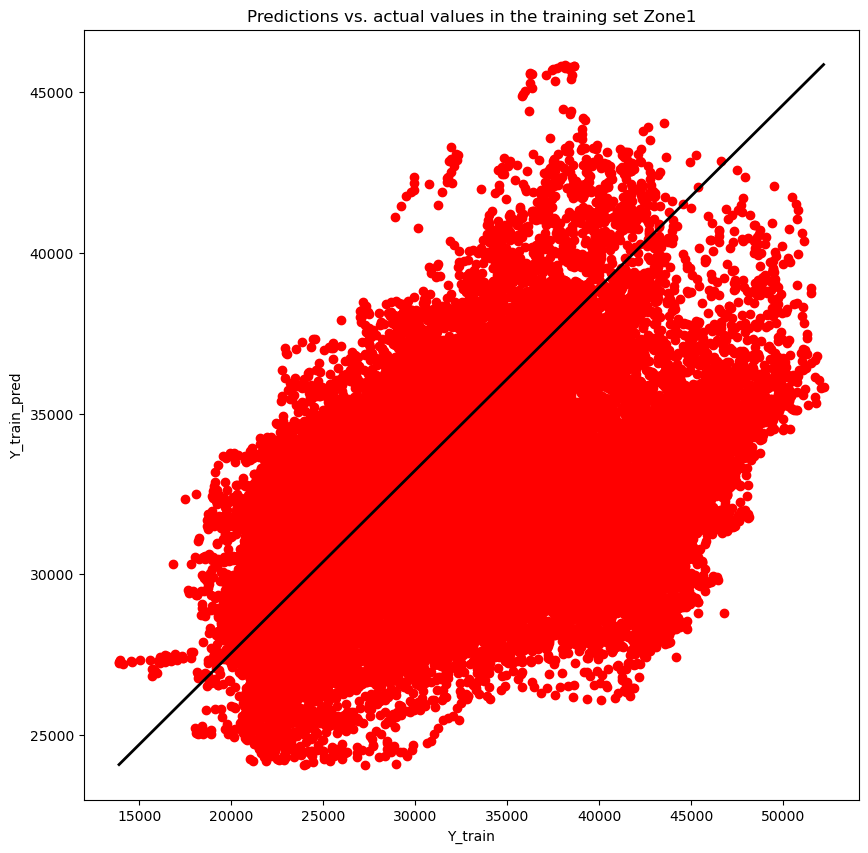

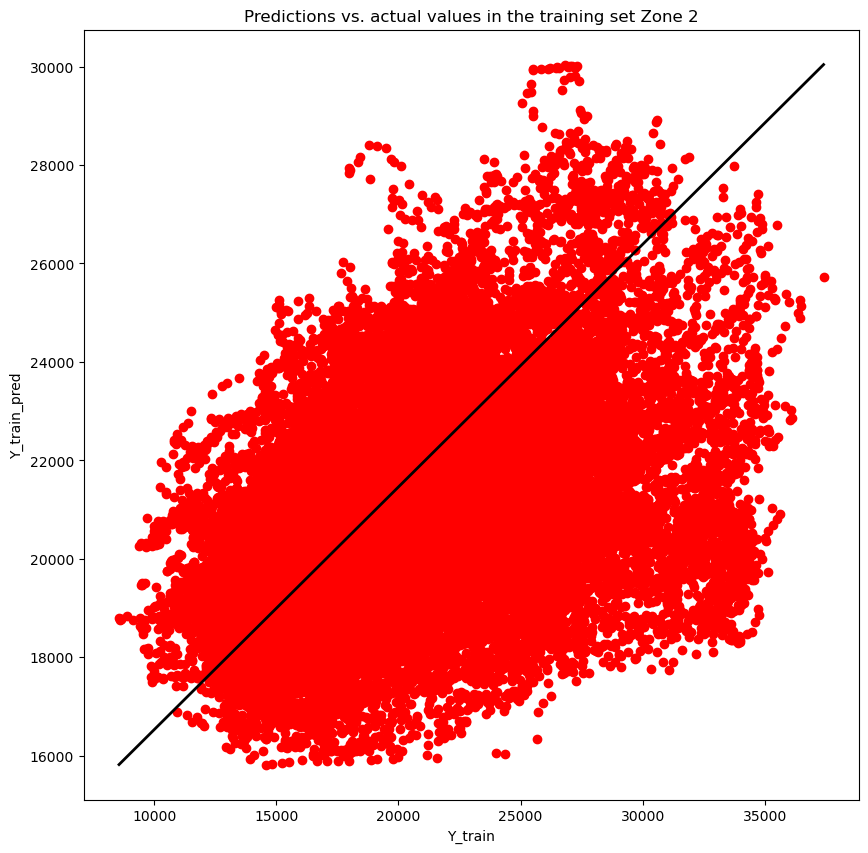

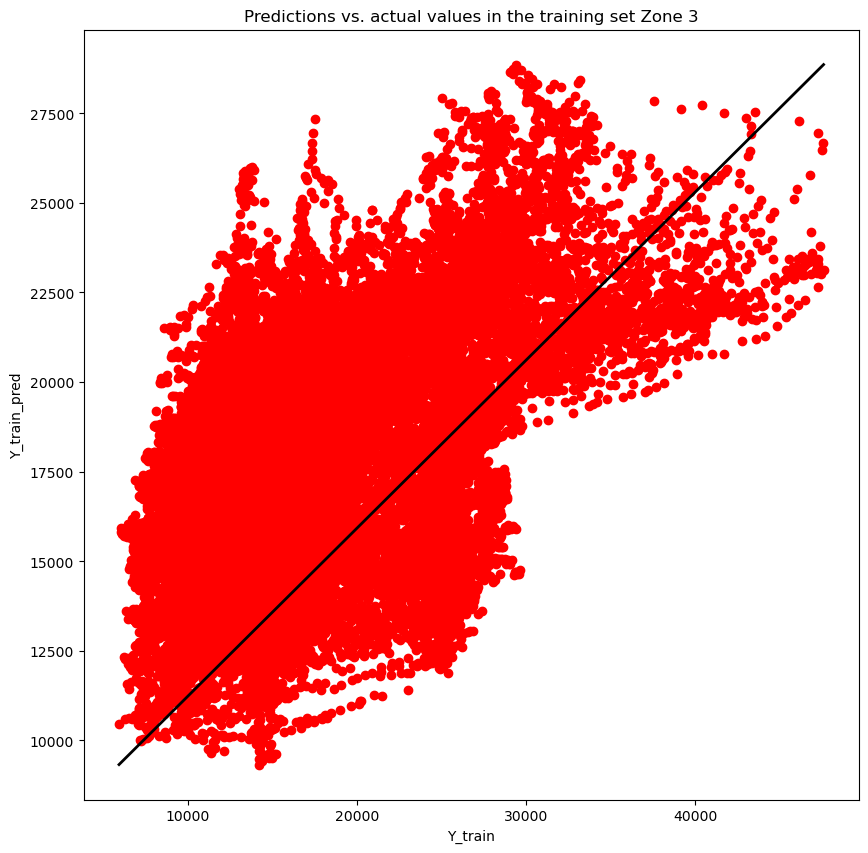

In [29]:
#Testing the model on the training set

# Zone 1
y_train_pred_z1 = lm_z1.predict(x_train1)

plt.figure(figsize = (10,10))
plt.scatter(y_train1,y_train_pred_z1,color='r')
plt.plot([y_train1.min(), y_train1.max()], [y_train_pred_z1.min(), y_train_pred_z1.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set Zone1")

# Zone 2
y_train_pred_z2 = lm_z2.predict(x_train2)

plt.figure(figsize = (10,10))
plt.scatter(y_train2,y_train_pred_z2,color='r')
plt.plot([y_train2.min(), y_train2.max()], [y_train_pred_z2.min(), y_train_pred_z2.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set Zone 2")

# Zone 3
y_train_pred_z3 = lm_z3.predict(x_train3)

plt.figure(figsize = (10,10))
plt.scatter(y_train3,y_train_pred_z3,color='r')
plt.plot([y_train3.min(), y_train3.max()], [y_train_pred_z3.min(), y_train_pred_z3.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set Zone 3")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set Zone 3')

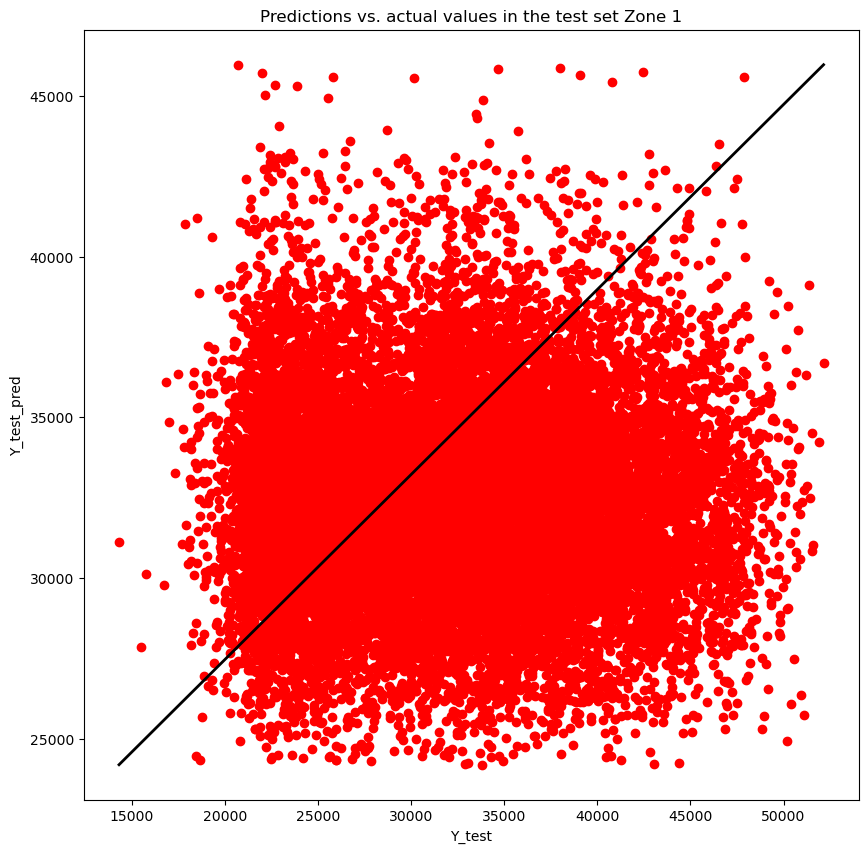

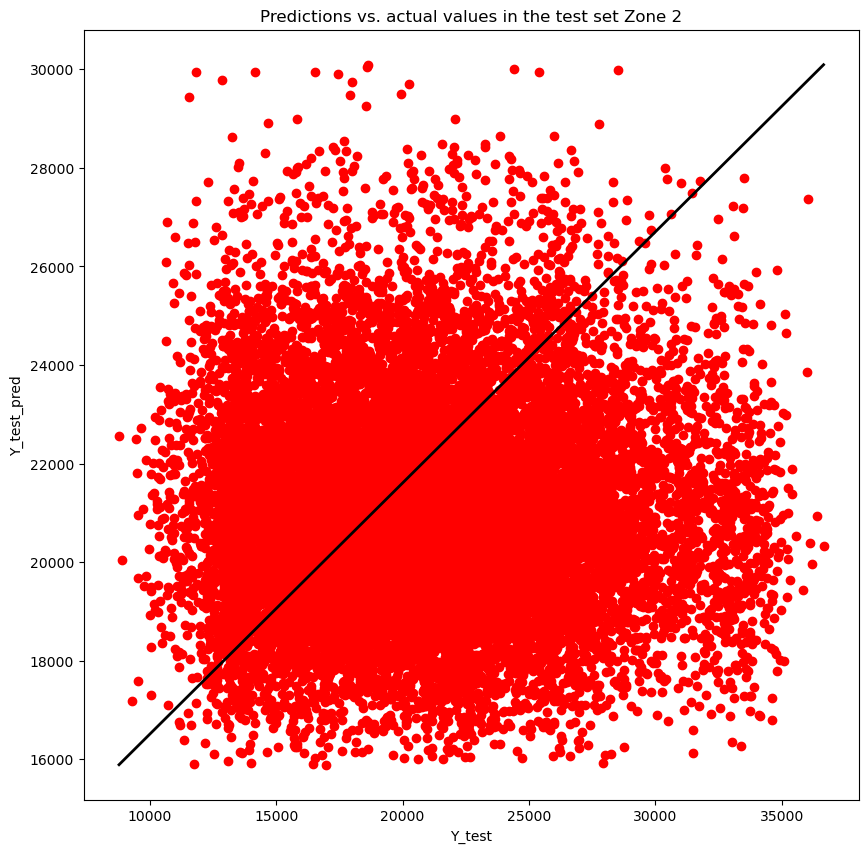

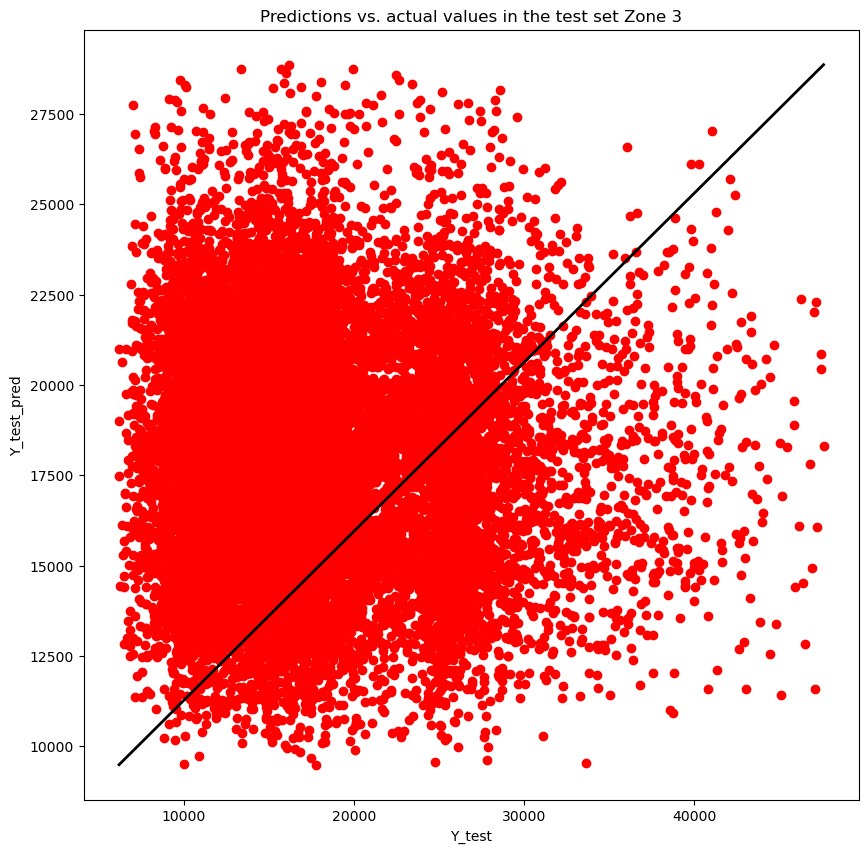

In [30]:
#Testing the model on the test set

# Zone 1
y_test_pred_z1 = lm_z1.predict(x_test_z1)

plt.figure(figsize = (10,10))
plt.scatter(y_test1,y_test_pred_z1,color='r')
plt.plot([y_test1.min(), y_test1.max()], [y_test_pred_z1.min(), y_test_pred_z1.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set Zone 1")

# Zone 2
y_test_pred_z2 = lm_z2.predict(x_test_z1)

plt.figure(figsize = (10,10))
plt.scatter(y_test2,y_test_pred_z2,color='r')
plt.plot([y_test2.min(), y_test2.max()], [y_test_pred_z2.min(), y_test_pred_z2.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set Zone 2")

# Zone 3
y_test_pred_z3 = lm_z3.predict(x_test_z1)

plt.figure(figsize = (10,10))
plt.scatter(y_test3,y_test_pred_z3,color='r')
plt.plot([y_test3.min(), y_test3.max()], [y_test_pred_z3.min(), y_test_pred_z3.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set Zone 3")

In [31]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

# Zone 1
MSE_trainz1 = metrics.mean_squared_error(y_train_z1, y_train_pred1)
RMSE_trainz1 = np.sqrt(MSE_trainz1)

print('Zone 1 training MSE:',round(MSE_trainz1,4))
print('Zone 1 training RMSE:',round(RMSE_trainz1,4))

# Zone 2
MSE_trainz2 = metrics.mean_squared_error(y_train_z2, y_train_pred2)
RMSE_trainz2 = np.sqrt(MSE_trainz2)

print('Zone 2 training MSE:',round(MSE_trainz2,4))
print('Zone 2 training RMSE:',round(RMSE_trainz2,4))

# Zone 3
MSE_trainz3 = metrics.mean_squared_error(y_train_z3, y_train_pred3)
RMSE_trainz3 = np.sqrt(MSE_trainz3)

print('Zone 3 training MSE:',round(MSE_trainz3,4))
print('Zone 3 training RMSE:',round(RMSE_trainz3,4))

Zone 1 training MSE: 40424370.1024
Zone 1 training RMSE: 6358.0162
Zone 2 training MSE: 22782056.5855
Zone 2 training RMSE: 4773.0553
Zone 3 training MSE: 32992791.6707
Zone 3 training RMSE: 5743.9352


In [32]:
#Computing the MSE and the RMSE values for the predictions made on the test set

# Zone 1
MSE_testz1 = metrics.mean_squared_error(y_test_z1, y_test_pred1)
RMSE_testz1 = np.sqrt(MSE_testz1)

print('Zone 1 testing MSE:',round(MSE_testz1,4))
print('Zone 1 testing MSE:',round(RMSE_testz1,4))

# Zone 2
MSE_testz2 = metrics.mean_squared_error(y_test_z2, y_test_pred2)
RMSE_testz2 = np.sqrt(MSE_testz2)

print('Zone 2 testing MSE:',round(MSE_testz2,4))
print('Zone 2 testing MSE:',round(RMSE_testz2,4))

# Zone 3
MSE_testz3 = metrics.mean_squared_error(y_test_z3, y_test_pred3)
RMSE_testz3 = np.sqrt(MSE_testz3)

print('Zone 3 testing MSE:',round(MSE_testz3,4))
print('Zone 3 testing MSE:',round(RMSE_testz3,4))

Zone 1 testing MSE: 40508609.9325
Zone 1 testing MSE: 6364.6375
Zone 2 testing MSE: 168623395.7145
Zone 2 testing MSE: 12985.5071
Zone 3 testing MSE: 251406045.4521
Zone 3 testing MSE: 15855.789


In [ ]:
import pandas as pd

# Function to estimate power consumption
def estimate_power(zone, temperature, humidity, wind_speed):
    """
    Estimate power consumption based on specific input for a selected zone.

    Parameters:
    - zone (int): Zone number (1, 2, or 3) representing different areas or systems.
    - temperature (float): Temperature value for the zone.
    - humidity (float): Humidity value for the zone.
    - wind_speed (float): Wind speed value for the zone.

    Returns:
    - Estimated power consumption (float) or an error message (str) if the zone is invalid.
    """
    # Combine inputs into a DataFrame with the exact feature names
    features = pd.DataFrame([[temperature, humidity, wind_speed]], columns=['Temperature', 'Humidity', 'Wind Speed'])

    # Check for valid zone input and predict using the corresponding model
    if zone == 1:
        standardized_features = sc_x_z1.transform(features)
        prediction = lm_z1.predict(standardized_features)
    elif zone == 2:
        standardized_features = sc_x_z2.transform(features)
        prediction = lm_z2.predict(standardized_features)
    elif zone == 3:
        standardized_features = sc_x_z3.transform(features)
        prediction = lm_z3.predict(standardized_features)
    else:
        return "Invalid Zone! Please choose 1, 2, or 3."

    # Return the predicted value (float)
    return prediction[0]

# Main script for user interaction
if __name__ == "__main__":
    print("Welcome to the Power Consumption Estimator!")
    try:
        # Get zone input with validation
        zone = input("Enter the Zone number (1, 2, or 3): ")
        if zone not in ['1', '2', '3']:
            raise ValueError("Invalid Zone! Please enter 1, 2, or 3.")
        zone = int(zone)  # Convert to integer after validation

        print("Provide the following details for Zone estimation:")

        # Get specific parameters
        temperature = float(input("Enter the Temperature: "))
        humidity = float(input("Enter the Humidity: "))
        wind_speed = float(input("Enter the Wind Speed: "))

        # Displaying the results
        estimated_power = estimate_power(zone, temperature, humidity, wind_speed)
        print(f"\nEstimated Power Consumption for Zone {zone}: {estimated_power:.2f}")
    except ValueError as ve:
        print("Error:", ve)
    except Exception as e:
        print("Error:", e)

Welcome to the Power Consumption Estimator!
